

# Project: Medical appointments analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil. 
A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
'No-show':‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Questions:
What is the pecentage of 'no-show' appointments? Is there any gender difference or location preference) ?
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data 
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Look for instances of missing or possibly errant data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 

In [6]:
#correct column title
df=df.rename(columns={'Hipertension':'Hypertension'})

In [7]:
# Convert to datetime and extract day of week
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df['day_of_week'] = df['AppointmentDay'].dt.strftime('%A')

In [8]:
# Drop unnecessayy columns  
df.drop(['PatientId','AppointmentID', 'ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [9]:
# cpoy and convert No_show to 0 and 1 
df['Noshow'] = df['No-show']
df['Noshow']=df['Noshow'].replace({'No': 0, 'Yes':1})
df['Noshow']=df['Noshow'].astype(int)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0


<a id='eda'></a>
## Exploratory Data Analysis

### What is the pecentage of 'no-show' appointments? 
### Is there any gender difference or location preferecne?

In [10]:
# Pecentage of 'no-show' appointments, total,  female and male

total_pect = len(df[df['No-show']=='Yes'])/len(df)*100
f_pect = len(df[(df['No-show']=='Yes') & (df['Gender']=='F')])/len(df[df['Gender']=='F'])*100
m_pect = len(df[(df['No-show']=='Yes') & (df['Gender']=='M')])/len(df[df['Gender']=='M'])*100

(total_pect,f_pect, m_pect) 

(20.193255946510806, 20.31458797327394, 19.967947889471915)

No gender difference is seen in overall percentage of no-show patients.

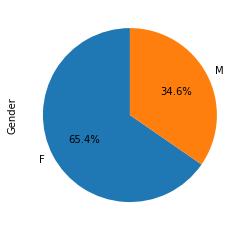

In [11]:
# gender difference bwtween all no_show appointments
df_no= df[df['No-show']=='Yes']
(df_no.groupby('Gender').Gender.count()/df_no.Gender.count()*100).plot(kind='pie',autopct='%1.1f%%',startangle=90);

However, f the no_show patitens, most of them are female.

In [12]:
# Which locations have higher no-show rate, top10? 

neigh_high=df[df['No-show']=='Yes'].groupby(['Neighbourhood']).Neighbourhood.count()/df.groupby(['Neighbourhood']).Neighbourhood.count()*100
neigh_high.nunique()
neigh_high.nlargest(5)


Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    100.000000
SANTOS DUMONT                   28.918495
SANTA CECÍLIA                   27.455357
SANTA CLARA                     26.482213
ITARARÉ                         26.266363
Name: Neighbourhood, dtype: float64

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

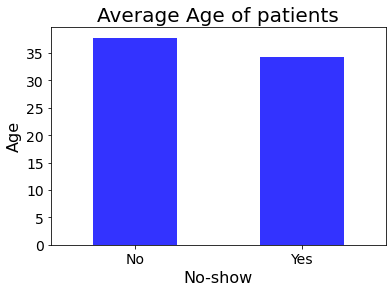

In [13]:
# Averge age 
df.groupby('No-show').Age.mean().plot(kind='bar',color='blue', alpha=0.8);
plt.title('Average Age of patients', size = 20);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Age',size=16);
plt.xlabel('No-show',size =16);


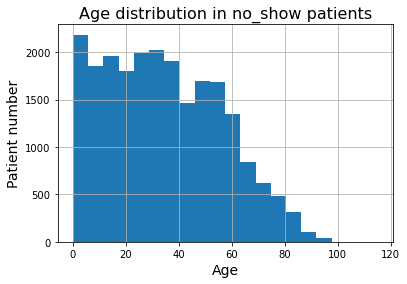

In [14]:
#AGe distributio in no_show patients
df_no= df[df['No-show']=='Yes']
plt.hist(df_no['Age'], bins=20);

plt.xlabel('Age',size=14)
plt.ylabel('Patient number',size= 14)
plt.title('Age distribution in no_show patients',size=16)
plt.grid(True)

It seems older patients are more likely on time for their medical appointments. 

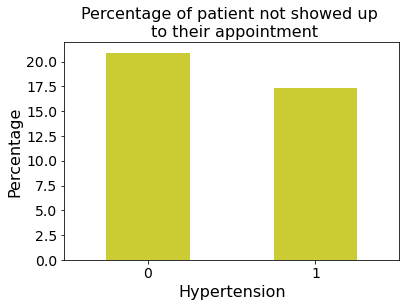

In [15]:
(df.groupby('Hypertension').Noshow.mean()*100).plot(kind='bar',color='y', alpha=0.8);
plt.title('Percentage of patient not showed up \n to their appointment', size = 16);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Percentage',size=16);
plt.xlabel('Hypertension',size =16);

Patients with hypertension have slightly lower chance of missing their appointments.  

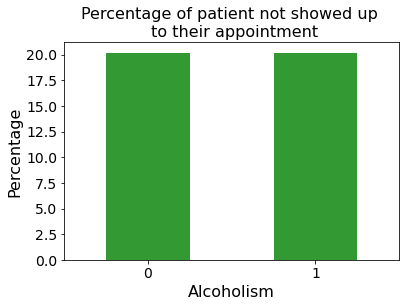

In [16]:
(df.groupby('Alcoholism').Noshow.mean()*100).plot(kind='bar',color='green', alpha=0.8);
plt.title('Percentage of patient not showed up \n to their appointment', size = 16);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Percentage',size=16);
plt.xlabel('Alcoholism',size =16);

Patients with alcoholism have equal chance of missing their appointments

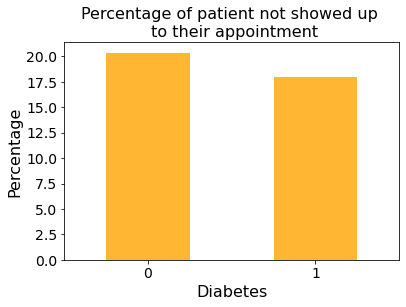

In [17]:
(df.groupby('Diabetes').Noshow.mean()*100).plot(kind='bar',color='orange', alpha=0.8);
plt.title('Percentage of patient not showed up \n to their appointment', size = 16);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Percentage',size=16);
plt.xlabel('Diabetes',size =16);

Patients with diabetes have slightly lower chance of missing their appointments. 

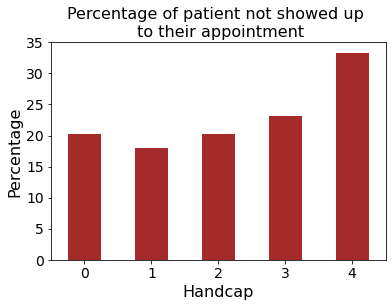

In [18]:
(df.groupby('Handcap').Noshow.mean()*100).plot(kind='bar',color='brown');
plt.title('Percentage of patient not showed up \n to their appointment', size = 16);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Percentage',size=16);
plt.xlabel('Handcap',size =16);

The level-4 handcapped patitens have a higher percentage of no_show appointments. 

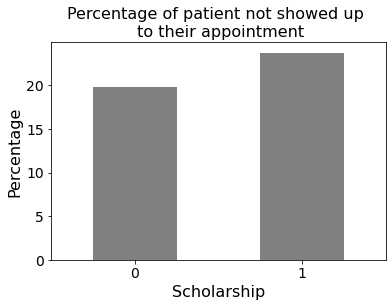

In [19]:
(df.groupby('Scholarship').Noshow.mean()*100).plot(kind='bar',color='grey');
plt.title('Percentage of patient not showed up \n to their appointment', size = 16);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Percentage',size=16);
plt.xlabel('Scholarship',size =16);

Patients recevied scholarship have slightly higher chance of missing their appointments.

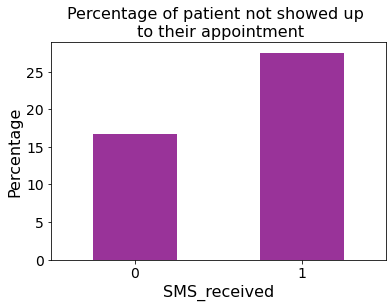

In [20]:
(df.groupby('SMS_received').Noshow.mean()*100).plot(kind='bar',color='purple', alpha=0.8);
plt.title('Percentage of patient not showed up \n to their appointment', size = 16);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Percentage',size=16);
plt.xlabel('SMS_received',size =16);

Patients recevied SMS have slightly higher chance of missing their appointments.

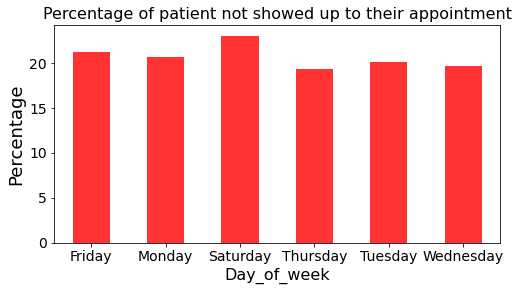

In [21]:
(df.groupby('day_of_week').Noshow.mean()*100).plot(kind='bar',color='red',alpha= 0.8, figsize=(8,4));
plt.title('Percentage of patient not showed up to their appointment', size = 16);
plt.xticks(rotation=360, size=14);
plt.yticks(size=14);
plt.ylabel('Percentage',size=18);
plt.xlabel('Day_of_week',size =16);

Appointments scheduled on Saturday are more likely to be missed than other weekdays.

<a id='conclusions'></a>
## Conclusions

### 1. There is about 20% of no_show medical appointment. Both male and female have similar ratio. 
### 2. The top 5 locations that have higher no_show pecenages than others are: 

ILHAS OCEÂNICAS DE TRINDADE    100.0  \
SANTOS DUMONT                   28.9\
SANTA CECÍLIA                   27.5 \
SANTA CLARA                     26.5 \
ITARARÉ                         26.3

### 3. Among all the factors,  patients, who received SMS notice, or had level-4 hadcap, have a higher percentage of no_show appointments. 

### 4. Limitations 
My analysis only provided the relationship between a single factor and the missed appointments. However, combination of several factors may increase the accuracy inorder to predict if a patient will show up for their scheduled appointment. 